## 1. Introduction

Heart disease, also known as cardiovascular disease, describes the range of conditions that affect the heart.

**Types of heart diseases include:**
* Abnormal heart rhythms(arrhythmias)
* Heart valve diseases
* Myocardial infarction(heart attack)
* Heart failure
* Congenital heart defects
* Dilated cardiomyopathy

Risk factors for heart disease can be classified as either modifiable or non-modifiable.

`Non-Modifiable` risk-factors include:

- Age
- Gender
- Family history
- Genetics

`Modifiable` risk-factors include:

- Smoking
- High Blood Pressure(Hypertension)
- High Cholesterol
- Drug Abuse
- Diabetes
- Obesisty
- Physical inactivity




## 2. Project Goal

In this project, the main objective is to develop a machine learning model that can classify a person's risk of having heart disease, with 1 being at a high risk and 0 being at a low risk.

The features used for classification include:

|Feature|Description|
|-------|-----------|
|Age| aasxkdhdcjkd|

The dataset used was sourced from [kaggle](https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset)

## 3. Workflow

The steps followed include:
1. [Import the necessary libraries](#libraries)
2. [Loading the dataset](#dataset)
3. [Exploratory Data Analysis](#eda)
4. [Cleaning and Transforming the data](cleaning)
5. [Feature Selection](#selection) 
6. [Feature Scaling](#scaling)
7. [Modeling](#model)
8. [Prediction](#prediction)
9. [Comparison](#comparison)
10. [Conclusion](#Conclusion)



<a name="libraries"></a>
### 1. Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

pd.set_option('display.max_columns', 50)
%matplotlib inline


### 2.Loading the dataset

In [3]:
heart_df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
heart_df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [4]:
heart_df.tail()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1
999,9990855,25,1,0,158,270,0,0,143,1,4.7,0,0,0


### 3. Exploratory Data Analysis

In [5]:
#shape
heart_df.shape

(1000, 14)

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [7]:
#checking for null values
heart_df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [8]:
#statistical summary
heart_df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [9]:
heart_df.dtypes

patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object

In [10]:
heart_df.gender.value_counts()

1    765
0    235
Name: gender, dtype: int64

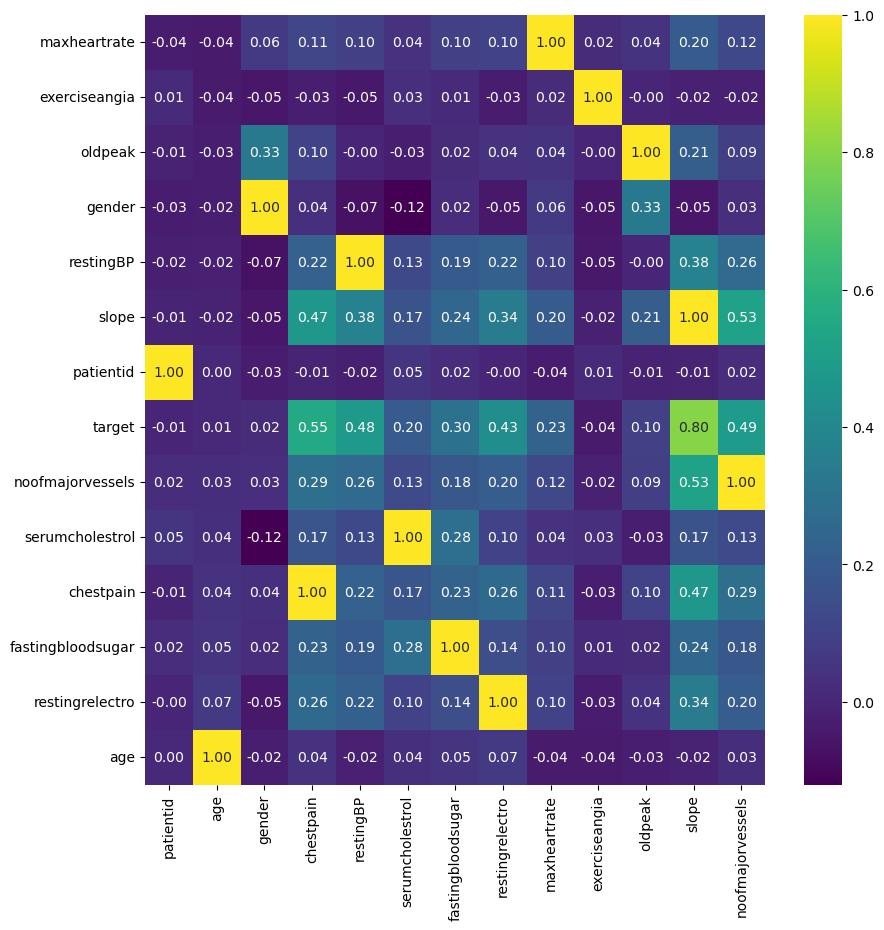

In [11]:
#correlation matrix
plt.figure(figsize=(10,10))

heart_corr = heart_df.corr()
heart = heart_corr.drop('target', axis=1)
new_heart = heart.sort_values(by='age')

sns.heatmap(new_heart, fmt='.2f', cmap='viridis', annot=True);

In [12]:
new_heart

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
maxheartrate,-0.036486,-0.040092,0.064606,0.114496,0.095569,0.038967,0.096528,0.099991,1.000000,0.015536,0.044614,0.201515,0.122763
exerciseangia,0.014338,-0.037581,-0.051746,-0.027376,-0.046545,0.029422,0.011356,-0.032489,0.015536,1.000000,-0.003296,-0.017783,-0.017513
oldpeak,-0.013825,-0.026020,0.331457,0.101345,-0.004225,-0.025910,0.015311,0.040291,0.044614,-0.003296,1.000000,0.208789,0.086992
gender,-0.031263,-0.024717,1.000000,0.035402,-0.069727,-0.120759,0.023560,-0.046634,0.064606,-0.051746,0.331457,-0.051957,0.029376
restingBP,-0.020926,-0.016126,-0.069727,0.222267,1.000000,0.126523,0.192063,0.219887,0.095569,-0.046545,-0.004225,0.376711,0.263194
slope,-0.010128,-0.015334,-0.051957,0.472731,0.376711,0.165569,0.242734,0.343280,0.201515,-0.017783,0.208789,1.000000,0.526536
patientid,1.000000,0.004978,-0.031263,-0.009679,-0.020926,0.053464,0.022331,-0.003667,-0.036486,0.014338,-0.013825,-0.010128,0.019465
target,-0.005637,0.008356,0.015769,0.554228,0.482387,0.195340,0.303233,0.426837,0.228343,-0.039874,0.098053,0.797358,0.489866
noofmajorvessels,0.019465,0.025407,0.029376,0.285156,0.263194,0.132419,0.182246,0.204684,0.122763,-0.017513,0.086992,0.526536,1.000000
serumcholestrol,0.053464,0.035439,-0.120759,0.174731,0.126523,1.000000,0.278337,0.101767,0.038967,0.029422,-0.025910,0.165569,0.132419


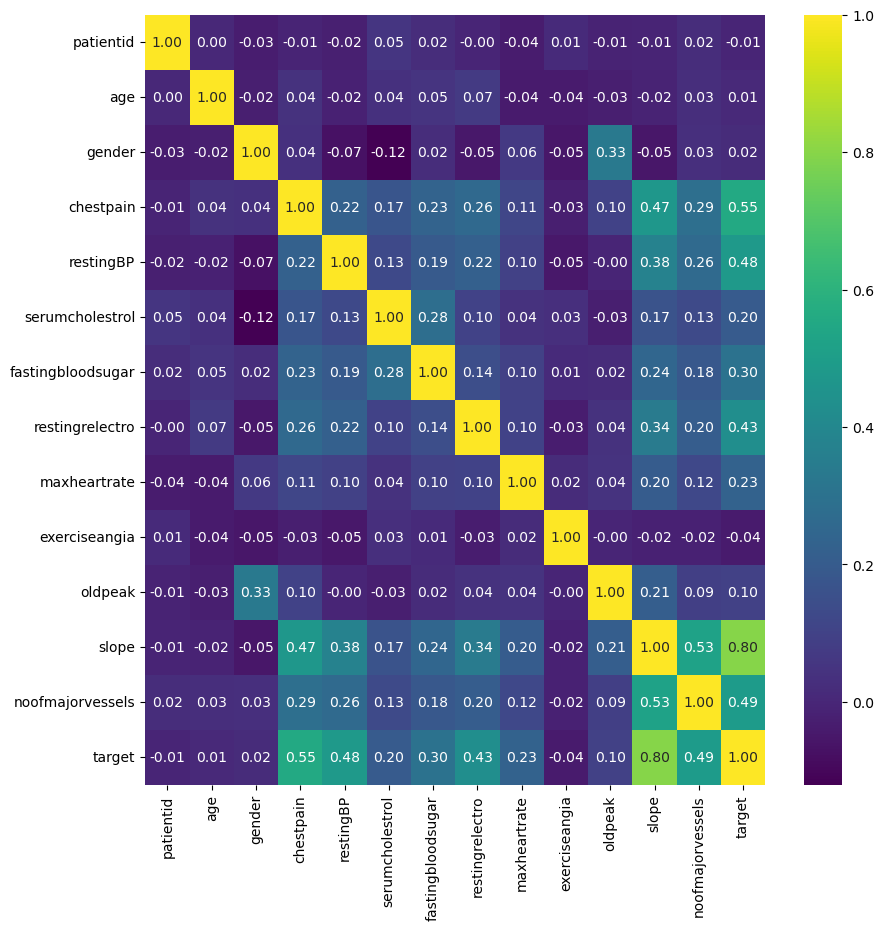

In [13]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(heart_df.corr(), fmt='.2f', cmap='viridis', annot=True);

### 4. Cleaning the data

In [14]:
heart_df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

Dropping the `patientid` column since it's useful in prediction

In [15]:
heart_df.drop('patientid', axis=1, inplace=True)
heart_df.sample(2)

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
164,41,1,3,194,390,0,2,198,0,5.0,2,3,1
756,74,1,0,198,137,0,1,104,1,2.7,0,0,0


### 5. Feature Selection


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [18]:
X = heart_df.drop('target', axis=1)
y = heart_df['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#copying and test features
X_train_copy = np.copy(X_train)
X_test_copy = np.copy(X_test)

### 6. Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
#scaler instance
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_copy)
X_test_scaled = scaler.transform(X_test_copy)

### 7.Modelling

#### 7.1 Random Forest Classifier

In [23]:
#USING RAW DATA

#instance of the class
rand = RandomForestClassifier()

#fitting the model
rand.fit(X_train, y_train)

#predicting
y_pred_raw = rand.predict(X_test)

In [24]:
#fitting using standardized data
rand.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [25]:
#predicting using standardized
y_pred_std = rand.predict(X_test_scaled)

In [26]:
# accuracy raw
accuracy1 = accuracy_score(y_test, y_pred_raw)
#accuracy standardized
accuracy2 = accuracy_score(y_test, y_pred_std)

print(accuracy1, accuracy2)

0.99 0.985


In [27]:
# cross validation using raw
cv_score1 = cross_val_score(rand, X_train, y_train, cv=5)
mean_cv_score1 = np.mean(cv_score1)
mean_cv_score1

0.97625

In [28]:
# cross validation using standardized
cv_score2 = cross_val_score(rand, X_train_scaled, y_train, cv=5)
mean_cv_score2 = np.mean(cv_score2)
mean_cv_score2

0.9650000000000001

In [29]:
precision_score(y_test, y_pred_raw)

0.9914529914529915

In [30]:
precision_score(y_test, y_pred_std)

0.975

#### 7.2 Decision Tree Classifier

In [31]:
#model instance
tree_model = DecisionTreeClassifier()

#fit the model
tree_model.fit(X_train, y_train)

#predicting
y_preds = tree_model.predict(X_test)

In [32]:
#accuracy
acc = accuracy_score(y_test, y_preds)
acc

0.965

In [33]:
cv_score = cross_val_score(tree_model, X_train, y_train, )
mean_cv_score = np.mean(cv_score)
mean_cv_score

0.9537500000000001

In [34]:
precision_score(y_test, y_preds)

0.9583333333333334

#### 7.3 Neural Network

In [35]:
# importing required libraries to build NN

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [36]:
# checking training and testing sizes
print('X_train:', np.shape(X_train_scaled))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test_scaled))
print('y_test:', np.shape(y_test))

X_train: (800, 12)
y_train: (800,)
X_test: (200, 12)
y_test: (200,)


In [37]:
# building the model using Sequential API
nn_model = Sequential()

# input layer
nn_model.add(Dense(units=16,\
               activation='relu',\
               input_shape=(12,)))

# output layer
nn_model.add(Dense(1, activation='sigmoid'))

#optimizer
adam = keras.optimizers.Adam(learning_rate=0.001)

# compiling the model
nn_model.compile(loss='binary_crossentropy',\
                 optimizer=adam,\
                metrics=["accuracy"])

In [38]:
# training the model
nn_model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20


25/25 [==============================] - 1s 3ms/step - loss: 0.7194 - accuracy: 0.5175
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.6413
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5523 - accuracy: 0.7212
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.7862
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8150
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8487
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8662
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8800
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3076 - accuracy: 0.8900
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2876 - accuracy: 0.8925
Epoch 11/20
25/25

In [39]:
# evaluating the modeL
loss_and_metrics = nn_model.evaluate(X_test_scaled, y_test)
print(loss_and_metrics)
print('loss=', loss_and_metrics[0])
print('accuracy=', loss_and_metrics[1])

7/7 [==============================] - 0s 3ms/step - loss: 0.1410 - accuracy: 0.9700
[0.1409936100244522, 0.9700000286102295]
loss= 0.1409936100244522
accuracy= 0.9700000286102295


In [40]:
# predicting
predicted = nn_model.predict(X_test_scaled)

7/7 [==============================] - 0s 1ms/step


In [42]:
# precision_score(y_test, predicted)

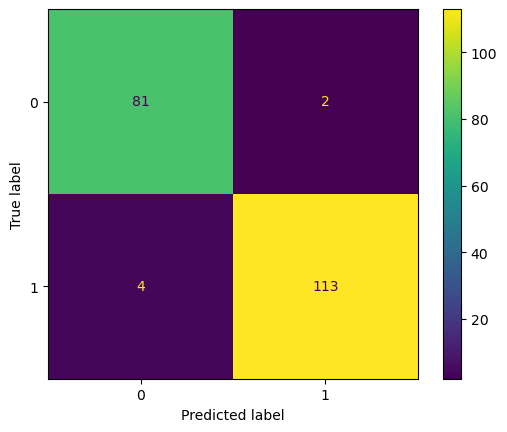

In [43]:
# evaluation of predictions using confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

predicted = tf.squeeze(predicted)
predicted = np.array([1 if x>=0.5 else 0 for x in predicted])

actual = np.array(y_test)

conf_mtx = confusion_matrix(actual, predicted)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mtx)
display.plot()


In [45]:
heart_df.sample(2)

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
194,62,1,0,125,264,0,0,92,0,2.2,0,0,0
402,43,1,2,150,353,0,1,149,1,3.2,2,1,1


In [49]:
# prediction test
test_prediction = nn_model.predict(33,0,10,160,436,0,1,120,1,2.5,1,1)
len(test_prediction)

TypeError: Model.predict() takes from 2 to 9 positional arguments but 13 were given